#**Part 1**


---


###Fully Connected Neural Neural using Pytorch

###Model

In [ ]:
import torch
import torch.nn as nn

input_size = 784 # 28x28
hidden_size = 128
output_size = 10

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self,nonlin):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Fully connected layer 1
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Fully connected layer 2
        self.fc3 = nn.Linear(hidden_size, output_size)  # Fully connected layer 3

        if nonlin == 'relu':
            self.nonlin = nn.ReLU()
        elif nonlin == 'sigmoid':
            self.nonlin = nn.Sigmoid()
        elif nonlin == 'tanh':
            self.nonlin = nn.Tanh()
        elif nonlin == 'swish':
            self.nonlin = nn.SiLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.nonlin(x)
        x = self.fc2(x)
        x = self.nonlin(x)
        x = self.fc3(x)
        return x

###Model Fitting/Training with Train Dataset

In [ ]:
def fit(net,learning_rate):
  optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
  ce_loss = nn.CrossEntropyLoss()
  for epoch in range(num_epochs):
      running_loss = 0.0
      running_acc = 0.0
      for _, data in enumerate(train_loader, 0):
          X, y = data
          optimizer.zero_grad()
          outputs = net(X.view(-1, input_size))
          loss = ce_loss(outputs, y)
          loss.backward()
          optimizer.step() 
          running_loss += loss.item() * X.size(0)
          pred = outputs.argmax(dim=1, keepdim=True)
          running_acc += pred.eq(y.view_as(pred)).sum().item() 
      print (f' Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader.dataset):.4f}, acc: {running_acc/len(train_loader.dataset):.4f}')


###Prediction

In [ ]:
# Evaluate the network on the test set
def predict(net):
  correct = 0
  total = 0
  with torch.no_grad():
      for data in test_loader:
          X, y = data
          outputs = net(X.view(-1, input_size))
          _, predicted = torch.max(outputs.data, 1)
          total += y.size(0)
          correct += (predicted == y).sum().item()

  print(' Accuracy on the test dataset: %d %%' % (100 * correct / total))


###Initializing dataset

100%|██████████| 9912422/9912422 [00:00<00:00, 354995997.51it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31752475.45it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 157476407.69it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17787608.56it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



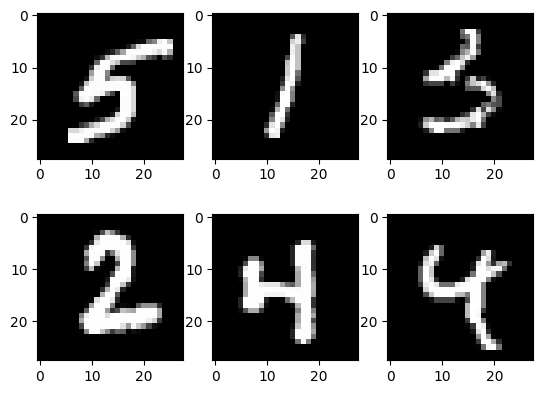

In [ ]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the batch size and number of epochs
batch_size = 64
num_epochs = 10
# Define the input size, hidden size, and output size
input_size = 784 # 28x28
hidden_size = 128
output_size = 10
learning_rate= 0.01

# Load the MNIST dataset

# dataset to train model
train_dataset = datasets.MNIST('data/', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# spliting the test data and validation data from test dataset
test_dataset = datasets.MNIST('data/', train=False, download=True, transform=transforms.ToTensor())
# X_val, X_test, y_val, y_test = train_test_split(test_dataset.data, test_dataset.targets, test_size=0.70, random_state=42)

# #dataset to evaluate model
# test_data = torch.tensor(X_test)
# test_targets = torch.tensor(y_test)
# test_dataset = torch.utils.data.TensorDataset(test_data, test_targets)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

#dataset to tune the hyper-parameters
# val_data = torch.tensor(X_val)
# val_targets = torch.tensor(y_val)
# validation_dataset = torch.utils.data.TensorDataset(val_data, val_targets)
validation_dataset = datasets.MNIST('data/', train=True, download=True, transform=transforms.ToTensor())
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)

train = iter(train_loader)
train_data, train_targets = next(train)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(train_data[i][0], cmap='gray')
plt.show()

# # network with RELU as activation function
# print("Using RELU as activation function")
# net = NeuralNetwork("relu")
# fit(net,learning_rate)
# predict(net)

# # network with sigmoid as activation function
# print("Using sigmoid as activation function")
# net = NeuralNetwork("sigmoid")
# fit(net,learning_rate)
# predict(net)

# # network with tanh as activation function
# print("Using tanh as activation function")
# net = NeuralNetwork("tanh")
# fit(net,learning_rate)
# predict(net)

# # network with swish as activation function
# print("Using swish as activation function")
# net = NeuralNetwork("swish")
# fit(net,learning_rate)
# predict(net)



#**Part 2**

---



###Tuning Using Hyper-parameters on Validation Set

In [ ]:
def train_using_scheduler(net,optimizer,num_epochs,scheduler=None):
  ce_loss = nn.CrossEntropyLoss()
  for epoch in range(num_epochs):
      running_loss = 0.0
      running_acc =0.0
      for _, data in enumerate(validation_loader, 0):
          X, y = data
          optimizer.zero_grad()
          outputs = net(X.view(-1, input_size))
          loss = ce_loss(outputs, y)
          loss.backward()
          optimizer.step()
          running_loss += loss.item() * X.size(0)
          pred = outputs.argmax(dim=1, keepdim=True)
          running_acc += pred.eq(y.view_as(pred)).sum().item()    
      if scheduler:
        scheduler.step
      print (f' Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader.dataset):.4f}, acc: {running_acc/len(train_loader.dataset):.4f}')

def lr_schedule(epoch):
    lrate = 0.001
    if epoch >= 50:
        lrate = 0.0005
    elif epoch >= 100:
        lrate = 0.0003
    return lrate



## without any scheduler , tweeking learning rate based on epochs

# net = NeuralNetwork("relu")
# optimizer = torch.optim.SGD(net.parameters(), lr=lr_schedule(10)) # 50 epochs
# train_using_scheduler(net,optimizer,10)
# predict(net)

# net = NeuralNetwork("relu")
# optimizer = torch.optim.SGD(net.parameters(), lr=lr_schedule(50)) # 80 epochs
# train_using_scheduler(net,optimizer,50)
# predict(net)

# net = NeuralNetwork("relu")
# optimizer = torch.optim.SGD(net.parameters(), lr=lr_schedule(100)) # 100 epochs
# train_using_scheduler(net,optimizer,100)
# predict(net)


## using scheduler with same learning rate for all scheduler
learning_rate = 0.1

# print("Using StepLR scheduler")
# net = NeuralNetwork("relu")
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)
# train_using_scheduler(net,optimizer,10,scheduler)
# predict(net)

# print("Using CyclicLR scheduler")
# net = NeuralNetwork("relu")
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr = 0.0001, max_lr = 1e-3, step_size_up = 4,mode = "triangular")
# train_using_scheduler(net,optimizer,scheduler)
# predict(net)

# print("Using ExponentialLR scheduler")
# net = NeuralNetwork("relu")
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer,gamma = 0.5)
# train_using_scheduler(net,optimizer,scheduler)
# predict(net)

# print("Using CosineAnnealingLR scheduler")
# net = NeuralNetwork("relu")
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max = 32,eta_min = 1e-4)
# train_using_scheduler(net,optimizer,scheduler)
# predict(net)

#**Part 3**

---

###Gradient Clipping, batch normalisation and L1 and L2 (weight decay) regularization

In [ ]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn

# Define the batch size and number of epochs
batch_size = 64
num_epochs = 10
# Define the input size, hidden size, and output size
input_size = 784 # 28x28
hidden_size = 128
output_size = 10
learning_rate= 0.01
weight_decay = 0.001


# Define the neural network architecture
class RegularizedNeuralNetwork(nn.Module):
    def __init__(self,nonlin):
        super(RegularizedNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Fully connected layer 1
        self.bn1 = nn.BatchNorm1d(hidden_size) # batch normalization layer 1
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Fully connected layer 2
        self.bn2 = nn.BatchNorm1d(hidden_size) # batch normalization layer 2
        self.fc3 = nn.Linear(hidden_size, output_size)  # Fully connected layer 3

        if nonlin == 'relu':
            self.nonlin = nn.ReLU()
        elif nonlin == 'sigmoid':
            self.nonlin = nn.Sigmoid()
        elif nonlin == 'tanh':
            self.nonlin = nn.Tanh()
        elif nonlin == 'swish':
            self.nonlin = nn.SiLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.nonlin(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.nonlin(x)
        x = self.bn2(x)
        x = self.fc3(x)
        return x

def train_regularized(model, optimizer, weight_decay):
    ce_loss = nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
      train_acc=0
      train_loss=0
      for _, (X, y) in enumerate(validation_loader,0):
          optimizer.zero_grad()
          # each output is of in a 64 batch size : 64 * 938 = 60,000 (train dataset size)
          outputs = model(X.view(-1, input_size))  
          #calculating loss function
          loss = ce_loss(outputs, y) 
          l2_reg = torch.tensor(0.)
          for param in model.parameters():
              l2_reg += torch.norm(param)
          loss += weight_decay * l2_reg      # l2 regularization
          # calculate gradient/partial derivative
          loss.backward()
          # Apply gradient clipping
          nn.utils.clip_grad_norm_(model.parameters(), 1.0)
          # update the weights
          optimizer.step()
          train_loss += loss.item() * X.size(0)
          pred = outputs.argmax(dim=1, keepdim=True)
          train_acc += pred.eq(y.view_as(pred)).sum().item()
      print (f' Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss/len(train_loader.dataset):.4f}, acc: {train_acc/len(train_loader.dataset):.4f}')
    
# Create an instance of the neural network
net = RegularizedNeuralNetwork("relu")
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, weight_decay=weight_decay) # l1 regularization
train_regularized(net,optimizer,weight_decay)
predict(net)


 Epoch [1/10], Loss: 0.7388, acc: 0.8198
 Epoch [2/10], Loss: 0.3069, acc: 0.9305
 Epoch [3/10], Loss: 0.2355, acc: 0.9479
 Epoch [4/10], Loss: 0.1982, acc: 0.9580
 Epoch [5/10], Loss: 0.1738, acc: 0.9646
 Epoch [6/10], Loss: 0.1571, acc: 0.9686
 Epoch [7/10], Loss: 0.1454, acc: 0.9710
 Epoch [8/10], Loss: 0.1340, acc: 0.9746
 Epoch [9/10], Loss: 0.1248, acc: 0.9770
 Epoch [10/10], Loss: 0.1178, acc: 0.9791
 Accuracy on the test dataset: 97 %


#**Part 4**

---

###Grid Search

In [ ]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

def fit(model, scheduler,optimizer, weight_decay):
    ce_loss = nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
      train_acc=0
      train_loss=0
      for _, (X, y) in enumerate(validation_loader,0):
          optimizer.zero_grad()
          # each output is of in a 64 batch size : 64 * 938 = 60,000 (train dataset size)
          outputs = model(X.view(-1, input_size))  
          #calculating loss function
          loss = ce_loss(outputs, y) 
          l2_reg = torch.tensor(0.)
          for param in model.parameters():
              l2_reg += torch.norm(param)
          loss += weight_decay * l2_reg      # l2 regularization
          # calculate gradient/partial derivative
          loss.backward()
          # Apply gradient clipping
          nn.utils.clip_grad_norm_(model.parameters(), 1.0)
          # update the weights
          optimizer.step()
          train_loss += loss.item() * X.size(0)
          pred = outputs.argmax(dim=1, keepdim=True)
          train_acc += pred.eq(y.view_as(pred)).sum().item()
      if scheduler:
        scheduler.step
      print (f' Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss/len(train_loader.dataset):.4f}, acc: {train_acc/len(train_loader.dataset):.4f}')
   

# Define hyperparameters to search over
lr_range = [0.001, 0.01, 0.1]
batch_size_range = [32, 64, 128]

# Create parameter grid
param_grid = {'lr': lr_range,'batch_size': batch_size_range}

net = RegularizedNeuralNetwork("relu")
ce_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(),lr = 0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)

estimator = NeuralNetClassifier(
    net,
    max_epochs=10,
    lr=0.01,
    optimizer='sgd',
    criterion=torch.nn.CrossEntropyLoss,
)

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3, verbose=10)
grid_search.fit(validation_dataset.data,validation_dataset.targets)
print(grid_search.best_params_)
print(grid_search.best_score_)


In [ ]:
!pip install skorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 18.0 MB/s eta 0:00:00


#**Part 5**

---

###5-fold cross validation



In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.model_selection import KFold

# Define number of folds
k = 5

# Create KFold instance
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Define batch size
batch_size = 64

# Define number of epochs
num_epochs = 10

# Loop over folds
for fold, (train_indices, test_indices) in enumerate(kf.split(range(len(train_dataset)))):

    # Create train and test samplers
    train_sampler = SubsetRandomSampler(train_indices)
    test_sampler = SubsetRandomSampler(test_indices)

    # Create data loaders
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
    test_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=test_sampler)

    #Define model, criterion, optimizer, and scheduler
    model = NeuralNetwork("relu")
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)

    # Train model
    train_using_scheduler(model, optimizer,num_epochs ,scheduler)

    # Evaluate model
    predict(model)

    # Print results
    # print(f"Fold {fold + 1}: Train Acc: {train_accs[-1]:.4f}, Valid Acc: {valid_accs[-1]:.4f}, Test Acc: {test_acc:.4f}")

# Evaluate base model
predict(model)

# Print results
# print(f"Base Model: Test Acc: {test_acc:.4f}")


#**Part 6** 

---


###Saving and Loading Model

In [ ]:
PATH = './cnn.pth'
torch.save(net.state_dict(), PATH)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loaded_model = NeuralNetwork()
loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the path file itself
loaded_model.to(device)
loaded_model.eval()